## Importacion de librerías

In [1]:
# Importación de librerías
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from tika import parser
from nltk import bigrams
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from gensim.models import Phrases

# pip install tika
# from tqdm import tqdm

## Carga de archivos

In [2]:
# Nombres de corporaciones y años a analizar.
corporations = ['AMD', 'Intel', 'Qualcomm']
years = ['2010', '2011', '2012', '2013','2014','2015', '2016', '2017', '2018', '2019', '2020']

In [3]:
# Obtención del current directory.
cwd = os.getcwd()

In [4]:
# Creación de objeto corpus.
corpus = {corp : {year : 'doc' for year in years} for corp in corporations}

In [5]:
# Lectura de archivos pdf y carga en corpus.
warnings.filterwarnings("ignore", category=DeprecationWarning)

for corp in corporations:
    for year in years:
        path = cwd + '\\' + corp + '\\' + year + '-10K.pdf'
        raw = parser.from_file(path)
        document = raw['content'].strip()
        # start = content.find('\nPART I\n')
        # end = content.find('\nPART II\n')
        # document = content[start:end]
        corpus[corp][year] = document

In [6]:
# Control de longitud de documentos.
for corp in corpus:
    for year in years:
        print(corp, year , len(corpus[corp][year]), end = ' | ')

AMD 2010 148775 | AMD 2011 144130 | AMD 2012 152147 | AMD 2013 149219 | AMD 2014 153736 | AMD 2015 156729 | AMD 2016 163506 | AMD 2017 172657 | AMD 2018 176791 | AMD 2019 166364 | AMD 2020 177111 | Intel 2010 91293 | Intel 2011 79616 | Intel 2012 88213 | Intel 2013 94516 | Intel 2014 97215 | Intel 2015 104600 | Intel 2016 96173 | Intel 2017 24689 | Intel 2018 58113 | Intel 2019 47902 | Intel 2020 57749 | Qualcomm 2010 139450 | Qualcomm 2011 142281 | Qualcomm 2012 142829 | Qualcomm 2013 135916 | Qualcomm 2014 148876 | Qualcomm 2015 139201 | Qualcomm 2016 157534 | Qualcomm 2017 182492 | Qualcomm 2018 182529 | Qualcomm 2019 189276 | Qualcomm 2020 200318 | 

In [7]:
# Creación de lista con el total de documentos.
corpus_list = []

for corp in corporations:
    for year in years:
        corpus_list.append(corpus[corp][year])

## Preprocessing de textos

In [8]:
# Conversión a minúsculas.
corpus_lower = {corp : {year : corpus[corp][year].lower() for year in years} for corp in corporations}

In [9]:
# Reemplazo de saltos de línea por espacios.
corpus_esp = {corp : {year : corpus_lower[corp][year].replace('\n', ' ') for year in years} for corp in corporations}

In [10]:
# Creación de objeto tokenizer.
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
# Comprehensión de diccionario para tokernizar cada documento.
corpus_tokenized = {corp : {year : tokenizer.tokenize(corpus_esp[corp][year]) for year in years} for corp in corporations}

In [12]:
# Control de cantidad de tokens para cada documento.
for corp in corpus:
    for year in years:
        print(corp, year , len(corpus_tokenized[corp][year]), end = ' | ')

AMD 2010 22686 | AMD 2011 21945 | AMD 2012 23290 | AMD 2013 22832 | AMD 2014 23464 | AMD 2015 23945 | AMD 2016 25024 | AMD 2017 26500 | AMD 2018 27152 | AMD 2019 25513 | AMD 2020 27124 | Intel 2010 13550 | Intel 2011 11889 | Intel 2012 13219 | Intel 2013 14259 | Intel 2014 14602 | Intel 2015 15696 | Intel 2016 14482 | Intel 2017 3740 | Intel 2018 8945 | Intel 2019 7345 | Intel 2020 8828 | Qualcomm 2010 20911 | Qualcomm 2011 21585 | Qualcomm 2012 21547 | Qualcomm 2013 20421 | Qualcomm 2014 22379 | Qualcomm 2015 20870 | Qualcomm 2016 23665 | Qualcomm 2017 27341 | Qualcomm 2018 27284 | Qualcomm 2019 28014 | Qualcomm 2020 29757 | 

In [13]:
# Comprehensión de diccionario para filtrar tokens numéricos.
corpus_notnum = {corp : {year : [token for token in corpus_tokenized[corp][year] if not token.isnumeric()] for year in years} for corp in corporations}

In [14]:
# Control de valores numéricos.
lista = corpus_notnum['AMD']['2010']
lista = np.array(lista)
filtro = [token.isnumeric() for token in corpus_notnum['AMD']['2010']]
filtro = np.array(filtro)
lista[filtro]

array([], dtype='<U18')

In [15]:
# Filtro de stopwords y palabras especiales.
stop_words = stopwords.words('english')
with open('Stopwords_Especial.txt', 'r') as f:
    stop_words_extra = f.read()
stop_words_extra = stop_words_extra.strip().split('\n')
stop_words = stop_words + stop_words_extra

corpus_filtered = {corp : {year : [token for token in corpus_notnum[corp][year] if token not in stop_words] for year in years} for corp in corporations}

In [16]:
# Control de cantidad de tokens para cada documento.
for corp in corpus:
    for year in years:
        print(corp, year , len(corpus_filtered[corp][year]), end = ' | ')

AMD 2010 11501 | AMD 2011 11081 | AMD 2012 11677 | AMD 2013 11414 | AMD 2014 11720 | AMD 2015 11980 | AMD 2016 12548 | AMD 2017 13365 | AMD 2018 13723 | AMD 2019 12971 | AMD 2020 13600 | Intel 2010 7272 | Intel 2011 6377 | Intel 2012 7051 | Intel 2013 7592 | Intel 2014 7706 | Intel 2015 8314 | Intel 2016 7564 | Intel 2017 2074 | Intel 2018 4956 | Intel 2019 4111 | Intel 2020 4963 | Qualcomm 2010 11066 | Qualcomm 2011 11560 | Qualcomm 2012 11532 | Qualcomm 2013 10924 | Qualcomm 2014 11955 | Qualcomm 2015 11156 | Qualcomm 2016 12566 | Qualcomm 2017 14592 | Qualcomm 2018 14641 | Qualcomm 2019 14899 | Qualcomm 2020 15726 | 

In [17]:
# Control de primeros 10 token.
corpus_filtered['AMD']['2010'][:10]

['cautionary',
 'statement',
 'regarding',
 'forward',
 'looking',
 'report',
 'forward',
 'looking',
 'forward',
 'looking']

In [18]:
# Impresión de documentos a txt.
try:
    os.mkdir('Corpus_Filtered')
except:
    pass
    
for corp in corpus:
    for year in years:
        document_str = ' '.join(corpus_filtered[corp][year])
        with open(cwd + '\\Corpus_Filtered\\' + corp + year + '.txt', 'w', encoding = 'utf-8') as f:
            f.write(document_str)
        # print(corp, year , len(corpus[corp][year]), end = ' - ')

## Creación de Bigramas

In [19]:
# Creación de lista con el total de documentos.
documents = []

for corp in corporations:
    for year in years:
        documents.append(corpus_filtered[corp][year])

In [20]:
# Creación de modelo bigrama.
bigram = Phrases(documents, min_count = 5, threshold = 1)

In [21]:
# Aplicación del modelo bigrama a cada documento.
corpus_bigram = corpus_filtered.copy()

for corp in corporations:
    for year in years:
        corpus_bigram[corp][year] = bigram[corpus_bigram[corp][year]]

In [22]:
# Control de cantidad de tokens para cada documento.
for corp in corporations:
    for year in years:
        print(corp, year , len(corpus_bigram[corp][year]), end = ' | ')

AMD 2010 7419 | AMD 2011 6813 | AMD 2012 7139 | AMD 2013 6639 | AMD 2014 6643 | AMD 2015 6661 | AMD 2016 7100 | AMD 2017 7768 | AMD 2018 8052 | AMD 2019 7758 | AMD 2020 8521 | Intel 2010 5001 | Intel 2011 4124 | Intel 2012 4605 | Intel 2013 4994 | Intel 2014 5100 | Intel 2015 5636 | Intel 2016 5178 | Intel 2017 1627 | Intel 2018 4038 | Intel 2019 3466 | Intel 2020 4271 | Qualcomm 2010 7664 | Qualcomm 2011 7856 | Qualcomm 2012 7428 | Qualcomm 2013 6674 | Qualcomm 2014 7287 | Qualcomm 2015 6496 | Qualcomm 2016 7470 | Qualcomm 2017 8827 | Qualcomm 2018 8889 | Qualcomm 2019 9298 | Qualcomm 2020 10545 | 

In [23]:
# Impresión de documentos a txt.
try:
    os.mkdir('Corpus_Bigrams')
except:
    pass
    
for corp in corpus:
    for year in years:
        document_str = ' '.join(corpus_bigram[corp][year])
        with open(cwd + '\\Corpus_Bigrams\\' + corp + year + '.txt', 'w', encoding = 'utf-8') as f:
            f.write(document_str)

## Uso de Spacy para clasificar tokens

In [24]:
# import spacy
# nlp = spacy.load("en_core_web_sm")
# doc = nlp(' '.join(corpus_bigram['AMD']['2010']))
# for token in doc:
#     print(token.text, token.pos_, token.dep_)
#     
# print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
# print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

## Análisis exploratorio

### Distribuciones de frecuencias

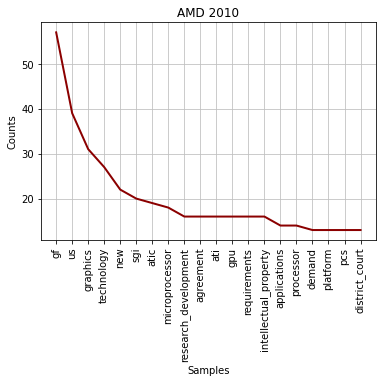

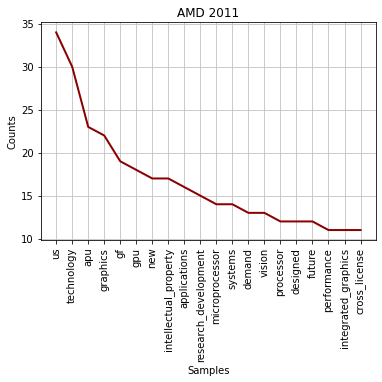

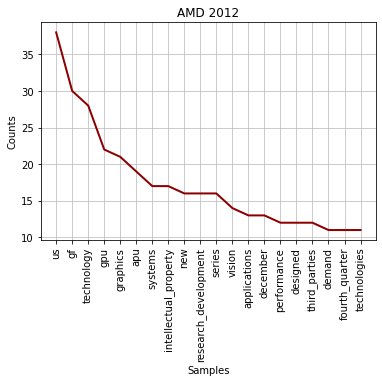

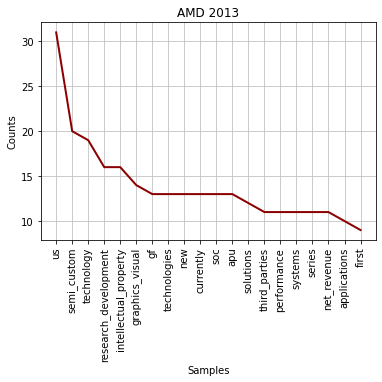

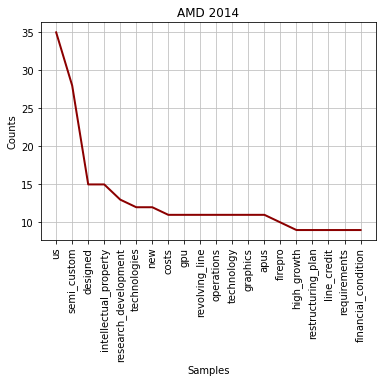

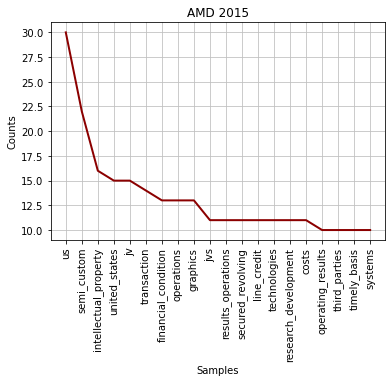

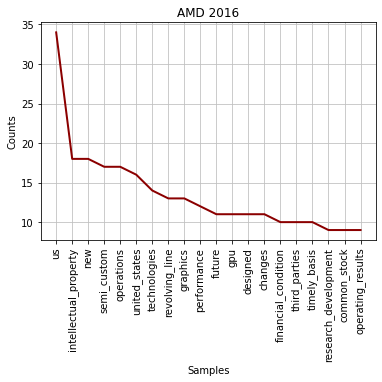

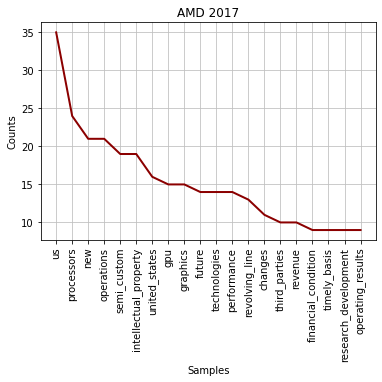

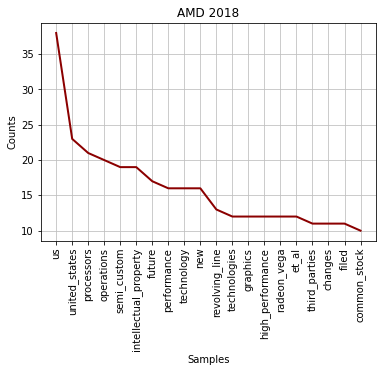

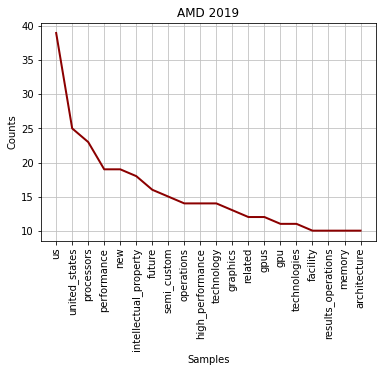

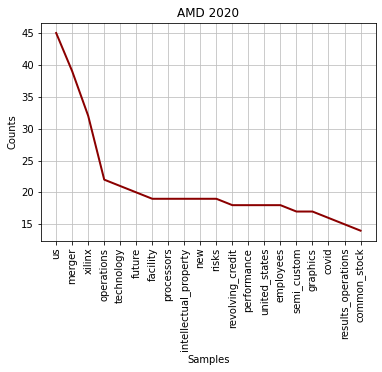

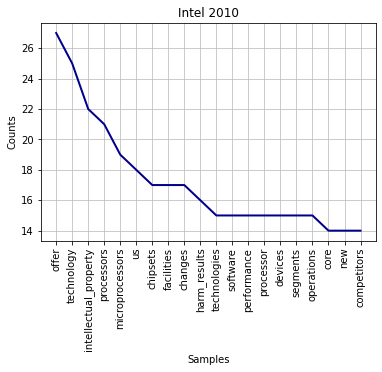

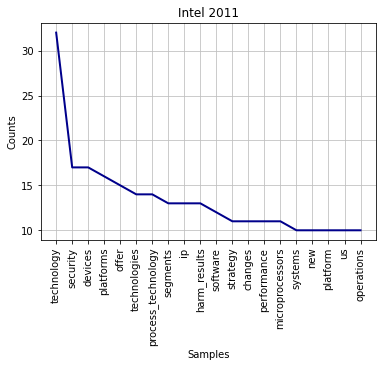

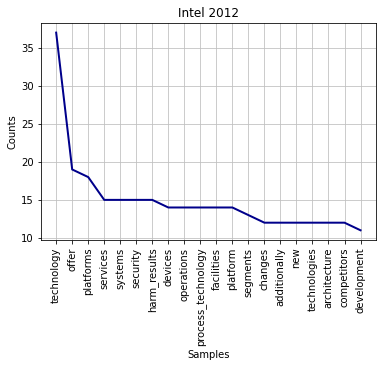

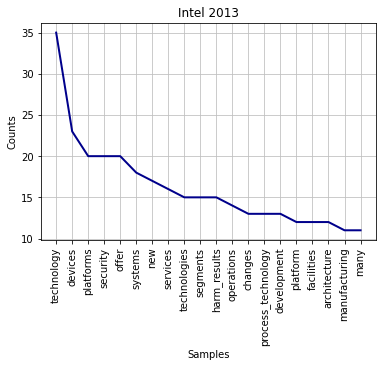

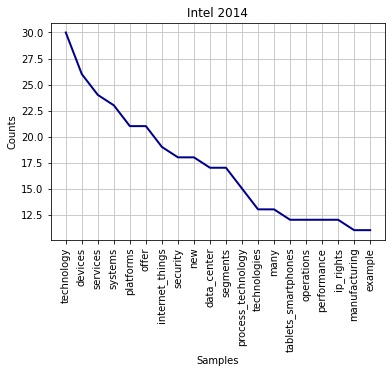

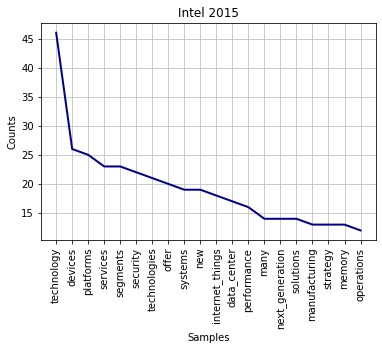

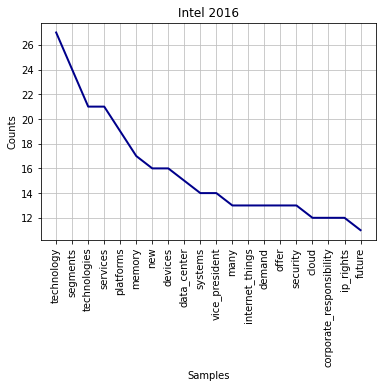

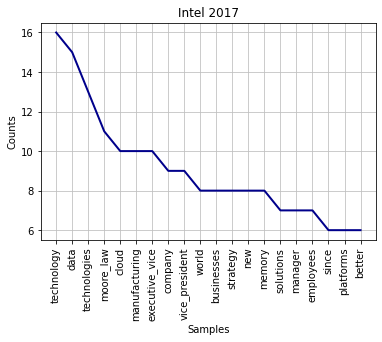

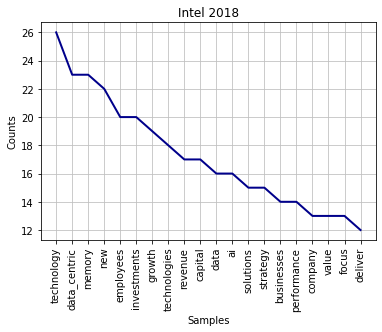

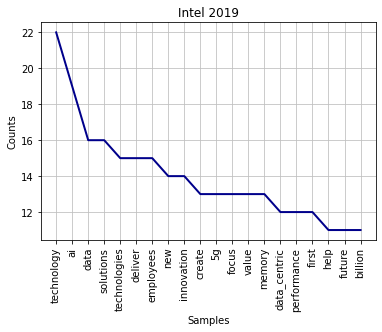

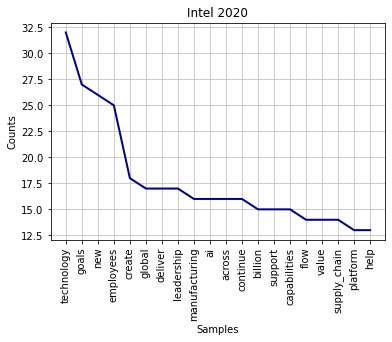

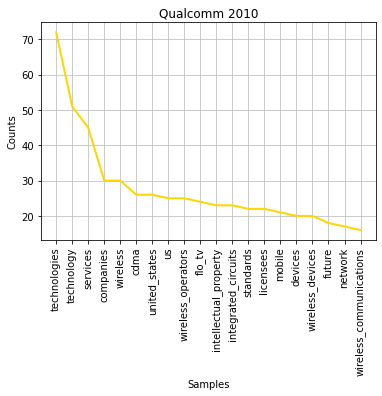

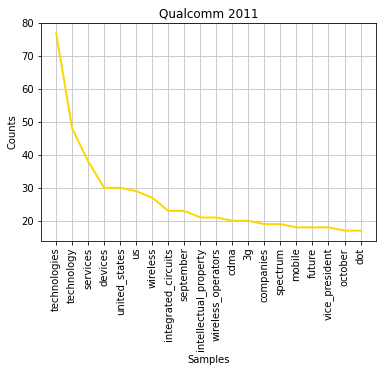

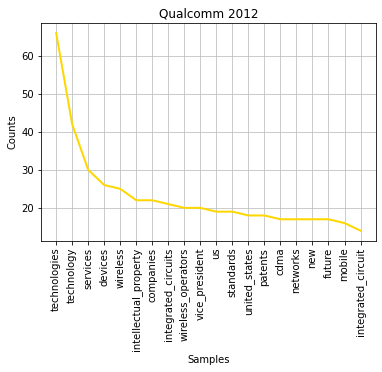

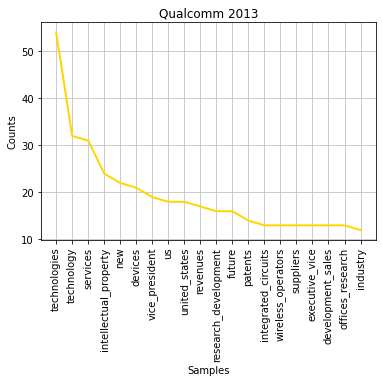

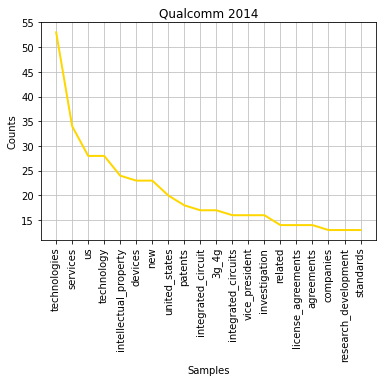

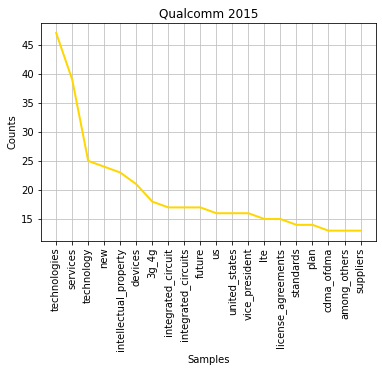

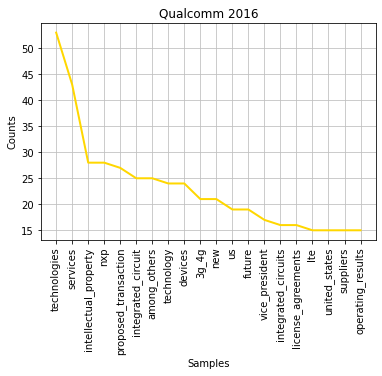

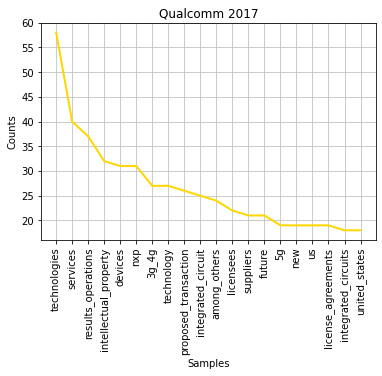

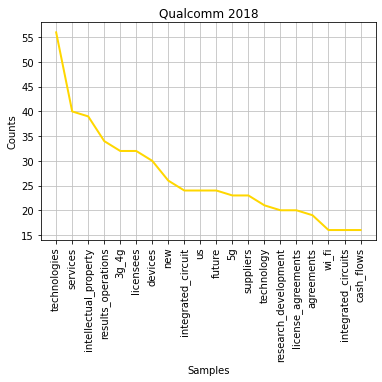

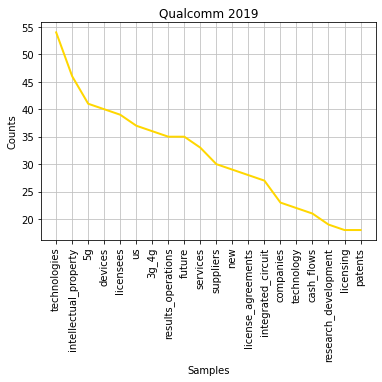

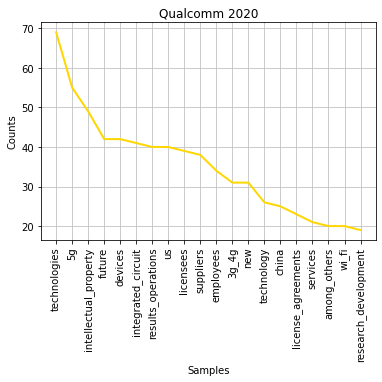

In [27]:
# Gráfico de distribuciones de frecuencias de tokens por compañia por periodo.
from nltk.probability import FreqDist

dirpath = 'Dist_Freq_Img'

try:
    os.mkdir(dirpath)
except:
    pass

line_color = {'AMD' : 'darkred', 'Intel': 'darkblue', 'Qualcomm': 'gold'}

for corp in corporations:
    for year in years:
        fdist = FreqDist(corpus_bigram[corp][year])
        # print(corp + ' ' + year + '\n')
        # print(fdist.most_common(30), end = ' ')
        # print('\n')
        fig = plt.figure()
        axes = plt.axes()
        axes.patch.set_alpha(0)
        ax = fdist.plot(20, cumulative = False, title = corp + ' ' + year, color = line_color[corp])
        imgpath = cwd + '\\' + dirpath + '\\' + corp + year + '.svg'
        fig.savefig(imgpath, bbox_inches='tight')

### Nubes de palabras

In [ ]:
# Representación gráfica mediante nubes de palabras.
# from wordcloud import WordCloud

# try:
#     os.mkdir('Wordclouds')
# except:
#     pass
#
# for corp in corporations:
#    for year in years:
#        doc = ' '.join(corpus_bigram[corp][year])
#        filename = cwd + '\\Wordclouds\\' + corp + year + '.png'
#        wordcloud = WordCloud(background_color = "white", 
#                      max_words = 1000, 
#                      contour_width = 3, 
#                      contour_color = 'steelblue')
#        wordcloud.generate(doc)
#        wordcloud.to_file(filename)
#        
# pip install wordcloud
# conda install -c conda-forge wordcloud

### Bag of words

In [ ]:
# Bag of words por corporación. Creación de objeto vectorizer.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [ ]:
# Creación de una lista para cada colección de documentos, por compañia.
corpus_amd_str = [' '.join(corpus_bigram['AMD'][i]) for i in corpus_bigram['AMD']]
corpus_intel_str = [' '.join(corpus_bigram['Intel'][i]) for i in corpus_bigram['Intel']]
corpus_qm_str = [' '.join(corpus_bigram['Qualcomm'][i]) for i in corpus_bigram['Qualcomm']]

In [ ]:
# Aplicación del modelo vectorizer al corpus AMD.
vec_amd = vectorizer.fit_transform(corpus_amd_str)
df_bow_amd = pd.DataFrame(vec_amd.toarray(), columns = vectorizer.get_feature_names())

# Reordenamiento de columnas.
df_bow_amd = df_bow_amd.loc[:, df_bow_amd.sum().sort_values(ascending = False).index]
df_bow_amd

In [ ]:
# Representación gráfica mediante treemaps.
# ! pip install squarify (algorithm for treemap)
# Importación de librerías.
import squarify

squarify.plot(sizes = df_bow_amd.iloc[:, 0:20].sum(), label = df_bow_amd.columns[0:20], alpha = 0.8)
plt.axis('off')
plt.show()

In [ ]:
# Aplicación del modelo vectorizer al corpus Intel.
vec_intel = vectorizer.fit_transform(corpus_intel_str)
df_bow_intel = pd.DataFrame(vec_intel.toarray(), columns = vectorizer.get_feature_names())

# Reordenamiento de columnas.
df_bow_intel = df_bow_intel.loc[:, df_bow_intel.sum().sort_values(ascending = False).index]
df_bow_intel

In [ ]:
# Representación gráfica mediante treemaps.
# ! pip install squarify (algorithm for treemap)
# Importación de librerías.
import squarify

squarify.plot(sizes = df_bow_intel.iloc[:, 0:20].sum(), label = df_bow_intel.columns[0:20], alpha = 0.8)
plt.axis('off')
plt.show()

In [ ]:
# Aplicación del modelo vectorizer al corpus Intel.
vec_qm = vectorizer.fit_transform(corpus_qm_str)
df_bow_qm = pd.DataFrame(vec_qm.toarray(), columns = vectorizer.get_feature_names())

# Reordenamiento de columnas.
df_bow_qm = df_bow_qm.loc[:, df_bow_qm.sum().sort_values(ascending = False).index]
df_bow_qm

In [ ]:
# Representación gráfica mediante treemaps.
# ! pip install squarify (algorithm for treemap)
# Importación de librerías.
import squarify

squarify.plot(sizes = df_bow_qm.iloc[:, 0:20].sum(), label = df_bow_qm.columns[0:20], alpha = 0.8)
plt.axis('off')
plt.show()

## Aplicación de modelos

### TD-IDF

In [ ]:
# Creación de modelo TD-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# Aplicación del modelo TD-IDF al corpus AMD.
vec_amd = vectorizer.fit_transform(corpus_amd_str)
df_tdidf_amd = pd.DataFrame(vec_amd.toarray(), columns = vectorizer.get_feature_names())
df_tdidf_amd = df_tdidf_amd.loc[:, df_tdidf_amd.sum().sort_values(ascending = False).index]
df_tdidf_amd

In [ ]:
# Aplicación del modelo TD-IDF al corpus Intel.
vec_intel = vectorizer.fit_transform(corpus_intel_str)
df_tdidf_intel = pd.DataFrame(vec_intel.toarray(), columns = vectorizer.get_feature_names())
df_tdidf_intel = df_tdidf_intel.loc[:, df_tdidf_intel.sum().sort_values(ascending = False).index]
df_tdidf_intel

In [ ]:
# Aplicación del modelo TD-IDF al corpus Qualcomm.
vec_qm = vectorizer.fit_transform(corpus_qm_str)
df_tdidf_qm = pd.DataFrame(vec_qm.toarray(), columns = vectorizer.get_feature_names())
df_tdidf_qm = df_tdidf_qm.loc[:, df_tdidf_qm.sum().sort_values(ascending = False).index]
df_tdidf_qm

### Modelo LDA

In [ ]:
# Creación de una lista para cada colección de documentos, por compañia.
corpus_amd = [corpus_bigram['AMD'][i] for i in corpus_bigram['AMD']]
corpus_intel = [corpus_bigram['Intel'][i] for i in corpus_bigram['Intel']]
corpus_qm = [corpus_bigram['Qualcomm'][i] for i in corpus_bigram['Qualcomm']]

In [ ]:
# 
import gensim
import gensim.corpora as corpora
from pprint import pprint

# Creacción de diccionario
id2word = corpora.Dictionary(corpus_amd)

# Create Corpus
# texts = corpus_amd

# Term Document Frequency
corpus_lda = [id2word.doc2bow(doc) for doc in corpus_amd]

# View
# print(corpus_lda[:1][0][:30])

# Eliminación de tokens con frecuencia extrema.
# from gensim.corpora import Dictionary

# Creación de diccionario de documentos.
# dict_amd = Dictionary(corpus_amd)

# Filtrado de tokens extremos.
# dictionary.filter_extremes(no_below=20, no_above=0.5)

print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus_lda))

# number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus = corpus_lda, id2word = id2word, num_topics = num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_lda]

In [ ]:
# ! pip install pyLDAvis
import pickle 
import pyLDAvis

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_' + str(num_topics))

In [ ]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_lda, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:


# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

In [ ]:
# Creación de lista con el total de documentos.
corpus_list = []

for corp in corporations:
    for year in years:
        corpus_list.append(corpus[corp][year])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

In [ ]:
text_counts = cv.fit_transform(corpus_list)

In [ ]:
text_counts

In [ ]:
text_counts.get_feature_names()

In [ ]:
cv_dataframe = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())
print(cv_dataframe)

In [ ]:
import nltk
nltk.download('punkt')



In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')



In [ ]:
import nltk
from nltk import word_tokenize
sent = corpus['AMD']['2010']
tokens = word_tokenize(sent)
nltk.pos_tag(tokens)

In [ ]:
# for corp in corporations:
#     for year in years:
#         document = corpus_filtered[corp][year]
#         bgs = bigrams(document)
#         fdist = FreqDist(bgs)
#         for k, v in fdist.items():
#             if v >= 5:
#                 print(' '.join(k))

In [ ]:
bigram = Phrases(sentences = ['new_york'])
sent = [u'the', u'mayor', u'of', u'new', u'york', u'was', u'there']
print(bigram[sent])

In [ ]:
from os.path import isfile
from os import makedirs
import re

from detectar_topicos import * # Importa las funciones del script detectar_topicos.py

from nltk.tokenize import RegexpTokenizer

from tqdm import tqdm

import gensim
from gensim import corpora
from gensim.models import Phrases
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from os.path import isfile
from os import makedirs
import re

from detectar_topicos import create_colection, join_named_entities, train_several_LDA_models, calculate_topic_coherence, plot_cv, plot_LDA_topics, make_table_all_topics

from nltk.tokenize import RegexpTokenizer
import spacy

from tqdm import tqdm

import gensim
from gensim import corpora
from gensim.models import Phrases
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)